In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

print(torch.__version__)

1.2.0


## Pytorch를 이용해서 Discriminator와 Generator의 출력 이미지를 시각화 시켜봅시다. 
### (Dataset : MNIST)

## 1. Device type을 지정해 줍니다.

#### GPU가 장착 되어있으면 GPU로, 그렇지 않으면 CPU로 할당

In [5]:
device = 
print("device : ", device)

device :  cuda


## 2. Hyper Parameter를 지정해 줍니다.

In [ ]:
batch_size = 512
num_epochs = 200
d_noise = 100 # noise dimenstion : 100 --> 100 차원을 가진 noise
d_hidden = 256 # 256차원인 Hidden layer
input_size = 28*28

## 3. transform를 정의를 해줍니다.

In [ ]:
transform = transforms.Compose([
    transforms._____, #MNIST Data를 가지고 올때 torch.tensor로 변경을 시켜줘서 가지고 옵니다.
    transforms.Normalize(_____))]

## 4. torchvision을 이용해서 MNIST Dataset을 가져옵니다.

In [ ]:
train_dataset = torchvision.datasets.MNIST(____)

test_dataset = torchvision.datasets.MNIST(____)

## 5. DataLoader를 사용해서 batch단위로 데이터를 loader할 준비를 시켜줍니다.

### [Hint] testset은 shuffle 금지

In [ ]:
train_loader = DataLoader(____)
test_loader = DataLoader(____)

## 6. MNIST 이미지를 시각화 시켜보기

#### 여기서 얻을 수 있는 점.
- torch.tensor -> numpy로 변경해주는 법을 익힐 수 있다.
- 데이터를 gpu에 붙였다가 뗴어서 cpu에 붙였다가 하는 방법을 배울 수 있다. 

In [ ]:
def grid_imshow(img):
    # 6-1. torchvision.utils.make_grid() 를 이용해서 그리드를 추가해 준다.
    img = torchvision.utils.make_grid(____)
 

    img = _____ # -1 ~ 1 범위를 +1을 더해서 2로 나눠주면 0 ~ 1의 범위를 갖게 된다.
    # 6-3. converted torch.tensor to numpy_array
    img_numpy = _____
    # 6-4. Shape을 변경시켜주기. (C, H, W) --> (H, W, C)
    img_numpy = np.transpose(_____)

    # img_numpy를 시각화 시켜주기
    plt.imshow(_____)
    plt.show()

### 6-1. 제너레이터를 이용해서 sample 데이터를 가지고 오고, mnist 이미지 24개를 시각화 시켜보자

sample images shape :  torch.Size([512, 1, 28, 28])
sample images type :  <class 'torch.Tensor'>
sample labels shape :  torch.Size([512])
sample labels type L  <class 'torch.Tensor'>


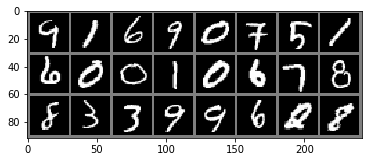

In [28]:
sample_image, sample_label = _____
print("sample images shape : ", sample_image.shape)
print("sample images type : ", type(sample_image)) 
print("sample labels shape : ", sample_label.shape) 
print("sample labels type L ", type(sample_label))

#이미지 시각화
grid_imshow(_____)

## 7. Generator를 구현해 보자.

In [29]:
def latent_z(batch_size=1, d_noise=100):
    return torch.randn(batch_size, d_noise, device=device)

# Generator model
# gpu device에 G모델을 할당해보기.
G = nn.Sequential(
    nn.Linear(d_noise, d_hidden),
    nn.ReLU(),
    nn.Linear(d_hidden, d_hidden),
    nn.ReLU(),
    nn.Linear(d_hidden, 28*28),
    _____ # 생성된 이미지의 pixel값이 -1 ~ 1 사이로 normalization이 되었기 때문에 Tanh사용.
)._____

# z_code 가지고 옴 (random noise)
z = latent_z()

fake_image = G(z).view(-1, 28, 28) # (1, 784) ==> (1, 28, 28)
print(fake_image.shape)

torch.Size([1, 28, 28])


### 7-1. Generator로 생성 된 Fake image 출력을 해보자.

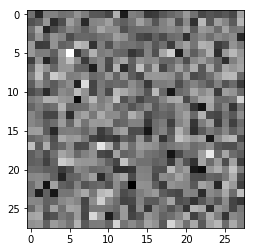

image shape :  (28, 28)
image type :  <class 'numpy.ndarray'>


In [33]:
def imshow(img):
    # 편의를 위해 -1 ~ 1의 범위를 0 ~ 1로 변경
    img = _____

    # 1 dim을 삭제하기 (squeeze() 사용)
    img = _____
    
    #torch_tensor --> numpy_array로 변경
    img_numpy = _____
    # fake image 출력에 대한 함수
    plt.imshow(img_numpy, cmap='gray')
    plt.show()
    print("image shape : ", img_numpy.shape)
    print("image type : ", type(img_numpy))

# batch_size = 1에 대한 fake image를 출력해보기.
imshow(fake_image._____)

## 7-2. batch_size만듬 Fake Image를 시각화 시켜보기

fake image batch shape :  torch.Size([512, 784])


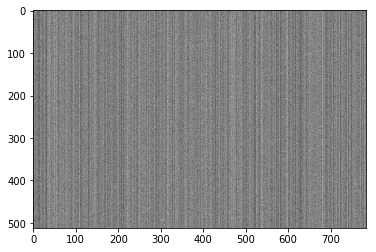

In [34]:
# batch_size만큼 noise 생성.
z = latent_z(batch_size)

fake_image = G(z)
print("fake image batch shape : ", fake_image.shape)

#grid_imshow() 함수를 이용해서 시각화 시키기
grid_imshow(fake_image)

## 8. Discriminator(경찰) 구현하기

In [1]:
# Discriminator model
# gpu device에 D모델을 할당해보기.

D = nn.Sequential(
    nn.Linear(input_size, d_hidden),
    nn.ReLU(),
    nn.Linear(d_hidden, d_hidden),
    nn.ReLU(),
    nn.Linear(d_hidden, 1), 
    # binary classification을 하기 위한 Activation layer 추가하기
    nn._____
)._____

print("G(z) : ", G(z).shape)
print("D(G(z)) : ", D(G(z)).shape)

output = D(G(z)).transpose(0, 1) 
print(output.shape)
print(output)

NameError: name 'nn' is not defined

## 9. Discriminator가 Generator가 만들어낸 Fake Image를 잘 맞췄는지 아닌지 결과값을 그래프로 그려보기.

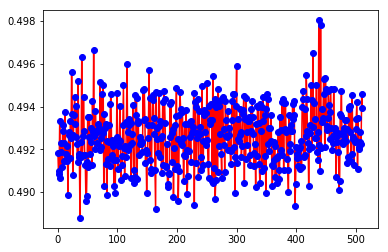

In [37]:
# output torch.tensor를 cpu로 할당하고 grad와 backward에서 벗어나기
output = output._____

plt.plot(output[0], 'r')
plt.plot(output[0], 'bo')
plt.show()